In [1]:
import os
from glob import glob
import shutil

from utils import get_chord_progressions, calculate_melody_results
from melody import Melody

In [2]:
input_folder = '../data/Complete Examples Melodies Auto/v1.2/Real Book'
filepaths = [y for x in os.walk(input_folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [3]:
filepaths[:]

["../data/Complete Examples Melodies Auto/v1.2/Real Book/'Round Midnight.mid",
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/A Felicidade.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/A Foggy Day.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/A Night In Tunisia.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/Accentuate The Positive.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/Afro Blue.mid',
 "../data/Complete Examples Melodies Auto/v1.2/Real Book/After You've Gone.mid",
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/Afternoon In Paris.mid',
 "../data/Complete Examples Melodies Auto/v1.2/Real Book/Ain't Misbehavin'.mid",
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/Airegin.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/Alice In Wonderland.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/All Blues.mid',
 '../data/Complete Examples Melodies Auto/v1.2/Real Book/

In [4]:
# filepaths = ['../data/Complete Examples Melodies Auto/v1.2/Real Book/Maiden Voyage.mid']

In [5]:
starting_measure_exceptions = {
    'Real Book - Beauty And The Beast': 5
}

key_exceptions = {
    'Real Book - Dolores': ('Db', 'major'),
    'Real Book - Epistrophy': ('Db', 'major'),
    'Real Book - Giant Steps': ('B', 'major'),
    'Real Book - Speak No Evil': ('C', 'minor'),
    'Real Book - Monk\'s Mood': ('Db', 'major'),
    'Real Book - Beautiful Friendship': ('Db', 'major'),
    'Real Book - House Of Jade': ('C', 'minor'),
    'Real Book - Laura': ('C', 'major'),
    'Real Book - In A Mellow Tone': ('F', 'major'),
    'Real Book - Come Sunday': ('Bb', 'major')
}

to_skip = {
    'Embraceable You',
    'I Don\'t Know Why',
    'In A Mellow Tone'
}

In [6]:
import music21

all_results = {}
for filename in filepaths:
    try:
        starting_measure = 2
        
        chord_progressions = get_chord_progressions('..')

        source = 'Real Book'
        # filename = f"../data/Complete Examples Melodies Auto/v1.2/{source}/A Felicidade.mid"

        melody = Melody(filename, '1.2', '..')
        
        if melody.filename in to_skip:
            continue
            
        print(melody.filename)
        
        melody.setup()
        melody.parse_notes()
        melody.set_song_structure(chord_progressions[melody.song_name])
        
        if melody.time_signature is None:
            melody.errors.append('no time signature')
        elif melody.time_signature[0] != 4:
            melody.errors.append('time signature not 4/4')
        
        if len(melody.errors) > 0:
            raise Exception(melody.errors[0])
        
        if f'{melody.source} - {melody.song_name}' in starting_measure_exceptions:
            starting_measure = starting_measure_exceptions[f'{melody.source} - {melody.song_name}']
            print(f'Using {starting_measure} for {melody.source} - {melody.song_name}')

        if f'{melody.source} - {melody.song_name}' in key_exceptions:
            tonic = key_exceptions[f'{melody.source} - {melody.song_name}'][0]
            mode = key_exceptions[f'{melody.source} - {melody.song_name}'][1]

            melody.key = music21.key.Key(tonic, mode)
            print(f'Using {melody.key.tonic} for {melody.source} - {melody.song_name}')
            
        melody.manually_align(starting_measure, True)
        
        results = calculate_melody_results(melody)

        for k, v in results.items():
            all_results_key = melody.filename + ' -' + str(k) + '-'
            all_results[all_results_key] = v

#         print(melody.filename)
    #     print(f'N. Repetitions: {len(melody.split_note_info)}')
    #     for k, v in results.items():
    #         print('Repetition ' + str(k))
    #         print(f"HC mean: {v['harmonic_consistency_mean']}, var: {v['harmonic_consistency_var']}")
    #         print(f"Silence Ratio: {v['silence_ratio']}")
    except Exception as e:
        print('#######')
        print(melody.filename, e)
        print('#######')

'Round Midnight.mid
Repetition 1, 181 notes
A Felicidade.mid
Repetition 1, 126 notes
A Foggy Day.mid
Repetition 1, 75 notes
A Night In Tunisia.mid
Repetition 1, 270 notes
Accentuate The Positive.mid
Repetition 1, 154 notes
Afro Blue.mid
#######
Afro Blue.mid time signature not 4/4
#######
After You've Gone.mid
Repetition 1, 81 notes
Afternoon In Paris.mid
Repetition 1, 129 notes
Ain't Misbehavin'.mid
Repetition 1, 125 notes
Airegin.mid
Repetition 1, 106 notes
Alice In Wonderland.mid
#######
Alice In Wonderland.mid time signature not 4/4
#######
All Blues.mid
#######
All Blues.mid time signature not 4/4
#######
All Of Me.mid
Repetition 1, 76 notes
All Or Nothing At All.mid
#######
All Or Nothing At All.mid 'All Or Nothing At All'
#######
All The Things You Are.mid
Repetition 1, 86 notes
Alone Together.mid
Repetition 1, 104 notes
Don't Blame Me.mid
Repetition 1, 102 notes
Donna Lee.mid
Repetition 1, 208 notes
Doxy.mid
Repetition 1, 81 notes
East Of The Sun.mid
Repetition 1, 102 notes
Eig

But Not For Me.mid
Repetition 1, 78 notes
Bye Bye Blackbird.mid
Repetition 1, 78 notes
C'est Magnifique.mid
#######
C'est Magnifique.mid "C'est Magnifique"
#######
Christmas Song.mid
Repetition 1, 150 notes
Come Rain Or Come Shine.mid
Repetition 1, 147 notes
Come Sunday.mid
Using B- for Real Book - Come Sunday
Repetition 1, 93 notes
Cottontail.mid
Repetition 1, 87 notes
Criss-Cross.mid
Repetition 1, 126 notes
Cry Me A River.mid
Repetition 1, 162 notes
Daahoud.mid
Repetition 1, 111 notes
Dancing On The Ceiling.mid
Repetition 1, 85 notes
Darn That Dream.mid
Repetition 1, 145 notes
Days Of Wine And Roses.mid
Repetition 1, 79 notes
Dearly Beloved.mid
Repetition 1, 70 notes
Deep Purple.mid
Repetition 1, 88 notes
Do Nothing 'Till You Hear From Me.mid
Repetition 1, 135 notes
I've Grown Accustomed To Her Face.mid
Repetition 1, 108 notes
Imagination.mid
Repetition 1, 134 notes
Impressions.mid
Repetition 1, 60 notes
In A Mellow Tone.mid
Using F for Real Book - In A Mellow Tone
Repetition 1, 115 

In [7]:
have_coda = [
    'Meditation',
    'Speak Low',
    'Blue In Green'
]

In [8]:
for k, results in all_results.items():
    folder_midi = f'../data/split_melody/v1.2/{source}/'
    folder_csv = f'../data/split_melody_data/v1.2/{source}/'

    src_midi = folder_midi + results['out_filename']
    dst_midi = src_midi.replace('split_melody/v1.2', 'finalised/midi')

    src_csv = folder_csv + results['out_filename'].replace('.mid', '.csv')
    dst_csv = src_csv.replace('split_melody_data/v1.2', 'finalised/csv')

    if not os.path.exists(os.path.dirname(dst_midi)):
        os.makedirs(os.path.dirname(dst_midi))

    if not os.path.exists(os.path.dirname(dst_csv)):
        os.makedirs(os.path.dirname(dst_csv))

    shutil.copyfile(src_midi, dst_midi)
    shutil.copyfile(src_csv, dst_csv)

In [9]:
for k, results in all_results.items():
    print(results['out_filename'])

'Round Midnight -o-.mid
A Felicidade -o-.mid
A Foggy Day -o-.mid
A Night In Tunisia -o-.mid
Accentuate The Positive -o-.mid
After You've Gone -o-.mid
Afternoon In Paris -o-.mid
Ain't Misbehavin' -o-.mid
Airegin -o-.mid
All Of Me -o-.mid
All The Things You Are -o-.mid
Alone Together -o-.mid
Don't Blame Me -o-.mid
Donna Lee -o-.mid
Doxy -o-.mid
East Of The Sun -o-.mid
Eighty-One -o-.mid
Embraceable You -o-.mid
Epistrophy -o-.mid
Equinox -o-.mid
Esp -o-.mid
Estate -o-.mid
Falling Grace -o-.mid
Fly Me To The Moon -o-.mid
Fools Rush In -o-.mid
Four On Six -o-.mid
Long Ago And Far Away -o-.mid
Lullaby Of Birdland -o-.mid
Lulu's Back In Town -o-.mid
Maiden Voyage -o-.mid
Make Someone Happy -o-.mid
Margie -o-.mid
Mean To Me -o-.mid
Meditation -o-.mid
Memories Of You -o-.mid
Misty -o-.mid
Monk's Mood -o-.mid
Mood Indigo -o-.mid
Moonglow -o-.mid
My Funny Valentine -o-.mid
My Little Suede Shoes -o-.mid
My One And Only Love -o-.mid
My Romance -o-.mid
My Shining Hour -o-.mid
My Ship -o-.mid
Nardis 

In [10]:
import pandas as pd

res = pd.DataFrame().from_dict(all_results).T

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='harmonic_consistency_mean', ylabel='Density'>

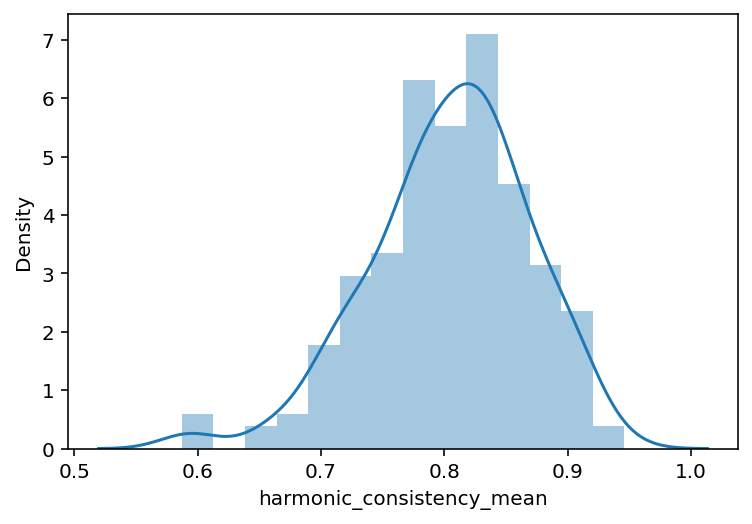

In [11]:
import seaborn as sns

sns.distplot(res['harmonic_consistency_mean'])

In [12]:
res['harmonic_consistency_mean'].sort_values(ascending=True).head(15)

Eighty-One.mid -0-                           0.587059
Epistrophy.mid -0-                           0.591667
They Can't Take That Away From Me.mid -0-     0.60459
Deep Purple.mid -0-                          0.653182
Blue Monk.mid -0-                            0.659298
In A Mellow Tone.mid -0-                     0.667304
House Of Jade.mid -0-                        0.671505
Prelude To A Kiss.mid -0-                    0.685085
Straight, No Chaser.mid -0-                   0.69625
Make Someone Happy.mid -0-                   0.698696
Speak No Evil.mid -0-                        0.699341
Lulu's Back In Town.mid -0-                  0.701468
Anthropology.mid -0-                         0.702727
Beauty And The Beast.mid -0-                 0.703854
Oleo.mid -0-                                  0.70431
Name: harmonic_consistency_mean, dtype: object

In [13]:
res['starting_measure'].value_counts()

2    197
5      1
Name: starting_measure, dtype: int64

In [14]:
all_results

{"'Round Midnight.mid -0-": {'cp_measures': 32,
  'n_measures': 98,
  'repetitions': 3,
  'min_measure': 2,
  'max_measure': 97,
  'outro_init': 0,
  'outro_auto': 0,
  'outro_difference': 0,
  'source': 'Real Book',
  'in_filename': "'Round Midnight.mid",
  'out_filename': "'Round Midnight -o-.mid",
  'starting_measure': 2,
  'melody_mido_key': <music21.key.Key of F# major>,
  'chord_progression_key': 'Ebm',
  'transpose_semitones': 0,
  'silence_ratio': 0.0,
  'harmonic_consistency': [1.0,
   1.0,
   0.66,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.66,
   1.0,
   0.66,
   1.0,
   1.0,
   1.0,
   1.0,
   0.66,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.66,
   1.0,
   1.0,
   0.66,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.66,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.66,
   1.0,
   0.66,
   1.0,
   1.0,
   1.0,
   1.0

In [15]:
melody.song_name

'Since I Fell For You'

In [16]:
melody.original

True

In [17]:
melody.split_note_info

[     pitch pitch_class        time  raw_ticks  quant_ticks  raw_duration  \
 0       70          Bb    7.520000   0.008333            0      0.341667   
 1       68          Ab    7.660000   0.341667           16      0.052083   
 2       70          Bb    7.893333   0.422917           20      0.043750   
 3       66          F#    8.086667   0.506250           24      0.020833   
 4       67           G    9.973333   0.516667           25      0.600000   
 ..     ...         ...         ...        ...          ...           ...   
 129     60           C  100.546667  29.266667         1405      0.154167   
 130     63          Eb  100.833333  29.427083         1412      0.083333   
 131     65           F  101.906667  29.514583         1417      0.331250   
 132     63          Eb  102.173333  29.839583         1432      0.089583   
 133     63          Eb  107.173333  30.014583         1441      1.477083   
 
      quant_duration  offset  measure  ticks  duration chord_name  
 0    

In [18]:
melody.note_info

,pitch,pitch_class,time,raw_ticks,quant_ticks,raw_duration,quant_duration,offset,measure
0,70,Bb,7.520000,2.008333,96,0.341667,16,0,2
1,68,Ab,7.660000,2.341667,112,0.052083,2,16,2
2,70,Bb,7.893333,2.422917,116,0.043750,2,20,2
3,66,F#,8.086667,2.506250,120,0.020833,1,24,2
4,67,G,9.973333,2.516667,121,0.600000,29,25,2
...,...,...,...,...,...,...,...,...,...
405,65,F,315.766667,98.522917,4729,0.154167,7,25,98
406,63,Eb,316.213333,98.677083,4736,0.139583,7,32,98
407,65,F,316.426667,98.843750,4744,0.039583,2,40,98
408,60,C,316.746667,98.925000,4748,0.058333,3,44,98


In [19]:
melody.time_signature

(4, 4)

In [20]:
melody.tempo

800000